In [41]:
import numpy as np
def myConv(x, n, y, m):
    l = n + m - 1
    x = np.pad(x, (0, m - 1))
    y = np.pad(y, (0, n - 1))
    res = np.zeros(l)
    for i in range(l):
        for j in range(l):
            if i >= j:
                res[i] = res[i] + x[i - j] * y[j]
    return res

Xn = 3 5 7 9 11
yn = 2 4 6 8 10
x[n] =  [3, 5, 7, 9, 11]
y[n] =  [2, 4, 6, 8, 10]
myConv =  [  6.  22.  52. 100. 170. 204. 208. 178. 110.]
Hazir konvolusyon =  [  6  22  52 100 170 204 208 178 110]


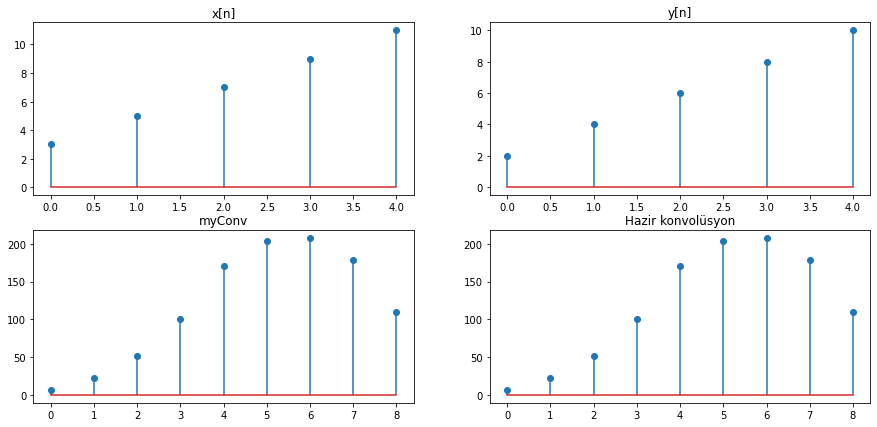

In [42]:
import matplotlib.pyplot as plt
arr1 = [int(a) for a in input('Xn = ').split()]
arr2 = [int(a) for a in input('yn = ').split()]
ex = myConv(arr1, len(arr1), arr2, len(arr2))
print('x[n] = ', arr1), print('y[n] = ', arr2), print('myConv = ', ex), print('Hazir konvolusyon = ', np.convolve(arr1, arr2))
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1), plt.title("x[n]"), plt.stem(arr1)
plt.subplot(2, 2, 2), plt.title("y[n]"), plt.stem(arr2)
plt.subplot(2, 2, 3), plt.title("myConv"), plt.stem(ex)
plt.subplot(2, 2, 4), plt.title("Hazir konvolüsyon"), plt.stem(np.convolve(arr1, arr2))
plt.show()

In [43]:
import sounddevice as sd
freq = 1125 * 2
duration1, duration2 = 5, 10

recording_5 = sd.rec(int(duration1 * freq), samplerate=freq, channels = 1)
print('5 saniyelik kayit basladi')
sd.wait()
print('5 saniyelik kayit bitti')

recording_10 = sd.rec(int(duration2 * freq), samplerate=freq, channels = 1)
print('10 saniyelik kayit basladi')
sd.wait()
print('10 saniyelik kayit bitti')
recording_5 = recording_5.flatten()
recording_10 = recording_10.flatten()

5 saniyelik kayit basladi
5 saniyelik kayit bitti
10 saniyelik kayit basladi
10 saniyelik kayit bitti


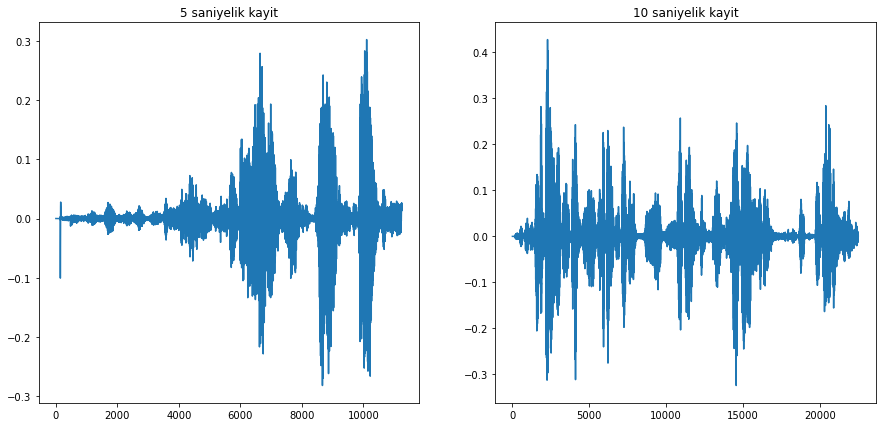

In [44]:
plt.figure(figsize = (15, 7))
plt.subplot(1, 2, 1), plt.plot(recording_5), plt.title('5 saniyelik kayit')
plt.subplot(1, 2, 2), plt.plot(recording_10), plt.title('10 saniyelik kayit')
plt.show()

In [45]:
n_5 = np.arange(0, len(recording_5))
yn_5 = recording_5[n_5] + 0.4 * recording_5[n_5 - 400] + 0.4 * recording_5[n_5 - 800]
My_Y1 = myConv(recording_5, len(recording_5), yn_5, len(yn_5))

In [46]:
n_10 = np.arange(0, len(recording_10))
yn_10 = recording_10[n_10] + 0.4 * recording_10[n_10 - 400] + 0.4 * recording_10[n_10 - 800]
My_Y2 = myConv(recording_10, len(recording_10), yn_10, len(yn_10))

In [47]:
Y1 = np.convolve(recording_5, yn_5)
Y2 = np.convolve(recording_10, yn_10)

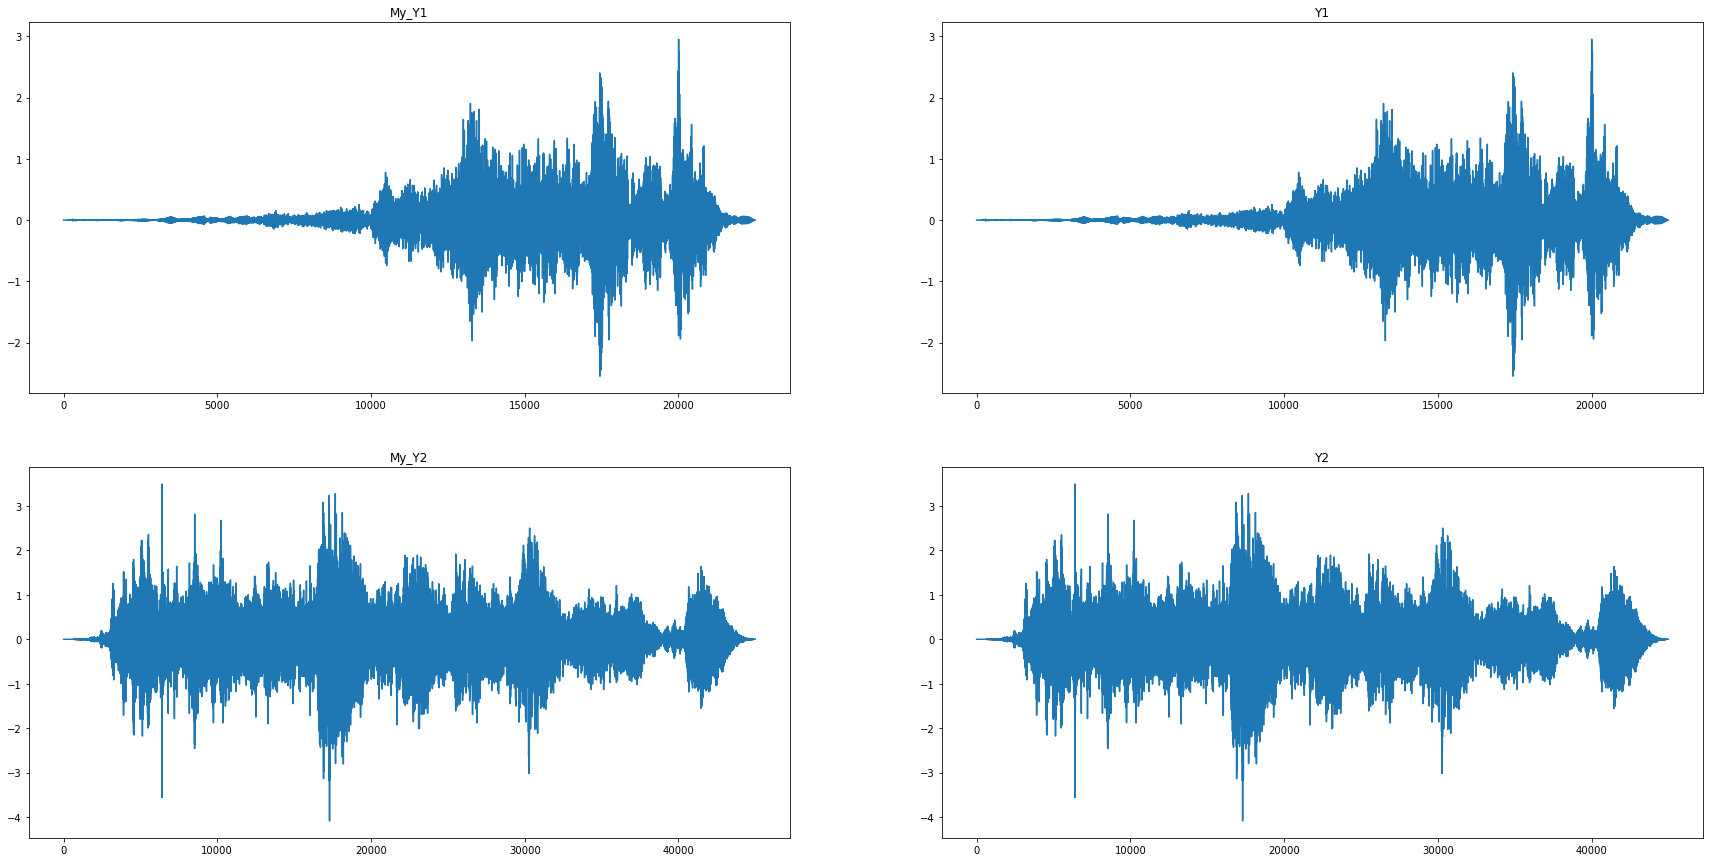

In [48]:
plt.figure(figsize = (30,15))
plt.subplot(2, 2, 1), plt.plot(My_Y1), plt.title('My_Y1')
plt.subplot(2, 2, 2), plt.plot(Y1), plt.title('Y1')
plt.subplot(2, 2, 3), plt.plot(My_Y2), plt.title('My_Y2')
plt.subplot(2, 2, 4), plt.plot(Y2), plt.title('Y2')
plt.show()

In [52]:
sd.play(recording_5, freq)

In [53]:
sd.play(recording_10, freq)

In [51]:
sd.play(My_Y1, freq)

In [27]:
sd.play(Y1, freq)

In [54]:
sd.play(My_Y2, freq)

In [ ]:
sd.play(Y2, freq)